<div class="alert alert-block alert-info"><b> 	Load the Libraries. </b> </div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle 
from statsmodels import robust
import warnings 
warnings.filterwarnings("ignore") 

<div class="alert alert-block alert-info"><b>Create the class</b> <b></b> <b></b> <br/>
<b>

    
    1. Load the data
    2. Find the no of data points(Rows) and Features(columns)
    3. Feature (Column) names
    4. No of data points in class
    5. Finding the class is imbalanced or balanced
    6. Pair Plot
    7. Hist Plot
    8. Probability density plots
    9. Mean and standard deviation
    10. Median, Percentile, Quantile, IQR, MAD
    11. Box plot and Whiskers
    12. Violin Plot
    13. Q-Q Plot
    

 </b>
    
</div>

In [2]:
class Exploratory_Data_analysis:
    dep_variable = "status"
    def __init__(self,data):
        # Load the data
        self.data = data
        self.No_of_Data_points()
    def No_of_Data_points(self):
        x= list(self.data.shape)
        return (x)
    def column_names(self):
        x= list(self.data.columns)
        return (x)
    def data_points_class(self):
        unique_class = list(self.data[self.dep_variable].unique())
        x= list(self.data[self.dep_variable].value_counts())
        for i,j in zip(range(0,len(unique_class)),range(0,len(x))):
            print(self.dep_variable + "->{}, No of data Points->{}".format(unique_class[i],x[j]))
        for i in range (0,len(x)):
            class_balance = (x[i]/len(self.data))* 100
            if (class_balance >= 90) and (class_balance <= 10):
                print("Class is Imbalance, Majority class will dominate predictions")
                break;
            if (class_balance >= 40) and (class_balance <= 60):
                print("Class is Balanced")
                #print (x[0]/len(self.data))* 100
                break;
            else:
                print("Class is okay balance")
                #print (int(x[0])/len(self.data))* 100
                break;
                
    def pair_plot(self):
        sns.set_style("whitegrid");
        sns.pairplot(self.data, hue = self.dep_variable, height= 4,vars=['age', 'year', 'nodes'])
        
        plt.show()
        
    def hist_plot(self):
        All_columns = list(self.column_names())
        All_columns.remove(self.dep_variable)
        #print(All_columns)
        for i in range (0,len(All_columns)):
            sns.FacetGrid(y.data, hue=self.dep_variable, height=6) \
    .map(sns.distplot, All_columns[i], kde=True) \
    .add_legend()
            plt.ylabel('Frequency')
            plt.title('Histogram of ' + All_columns[i] + ' of different ' + y.dep_variable )
            
    def pdf_plots(self):
        # Reference on subplots https://www.youtube.com/watch?v=4DnWYK88-E4
        All_columns = list(self.column_names())
        All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        res=[]
        for i in All_columns:
            for j in class_varaible_list:
                res.append((i,j))
        res = list(enumerate(res))
        #print(res)
        plt.figure(figsize=(15,15))
        for i in res:
            #print(i)
            #print(i[1][0])
            plt.subplot(3,2,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            df0=self.data[self.data[self.dep_variable]==i[1][1]]
            counts, bin_edges = np.histogram(df0[i[1][0]], bins=10, density = True)

            #print(c)
            #print(i[1][0])
            #print (counts)
            #print(bin_edges)
            pdf = counts/(sum(counts))
            cdf = np.cumsum(pdf)
            #ax = fig.add_subplot(6,2,num)

            plt.plot(bin_edges[1:],pdf, 'r-')
            plt.plot(bin_edges[1:],cdf, 'b-')
            plt.title(self.dep_variable +'->'+ str(i[1][1]))
            plt.xlabel(i[1][0])
            plt.ylabel('Probability')
    def Statistics_Mean_Std(self):
        unique_class = list(self.data[self.dep_variable].unique())
        unique_class_list = []
        Measure_List = ['Mean','Stand_Dev']
        for i in unique_class:
            for j in Measure_List:
                unique_class_list.append(self.dep_variable + str(i)+'_'+ j)
        dx = pd.DataFrame( columns = unique_class_list)
        All_columns = list(self.column_names())
        All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        for i in All_columns:
            res=[]
            for j in class_varaible_list:
                df0=self.data[self.data[self.dep_variable]==j]
                Mean_Var = np.mean(df0[i])
                res.append(Mean_Var)
                std_Var =  np.std(df0[i])
                res.append(std_Var)
            df2 = pd.DataFrame ([res],columns = unique_class_list, index=[i] )
            dx = dx.append(df2)
        return dx
    
    def Statistics_Median_Percentile_Quantile_IQR_MAD(self):
        unique_class = list(self.data[self.dep_variable].unique())
        unique_class_list = []
        Measure_List = ['Median','0_Quantile','25_Quantile', '50_Quantile','75_Quantile','90_Percentile',
                 'MAD' ]
        for i in unique_class:
            for j in Measure_List:
                unique_class_list.append(self.dep_variable + str(i)+'_'+ j)
        dx = pd.DataFrame( columns = unique_class_list)
        All_columns = list(self.column_names())
        All_columns.remove(self.dep_variable)
        class_varaible_list = list(self.data[self.dep_variable].unique())
        for i in All_columns:
            res=[]
            perc = []
            for j in class_varaible_list:
                df0=self.data[self.data[self.dep_variable]==j]
                Median_Var = np.median(df0[i])
                res.append(str(Median_Var))
                Quantile = list(np.percentile(df0[i],np.arange(0, 100, 25)))
                res= res + Quantile
                ninety_perc = np.percentile(df0[i],90)
                res.append(str(ninety_perc))
                Mad = robust.mad(df0[i])
                res.append(Mad)
                
            df2 = pd.DataFrame ([res],columns = unique_class_list, index=[i] )
            dx = dx.append(df2)
        return dx
    def Box_Plot(self):
        
        All_columns = list(self.column_names())
        All_columns.remove(self.dep_variable)
        res = list(enumerate(All_columns))
        plt.figure(figsize=(15,15))
        for i in res:
            plt.subplot(3,1,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            sns.boxplot(x=self.dep_variable,y=i[1], data=y.data)
            plt.title(i[1] + ' distribution for different ' + self.dep_variable, fontdict=None, loc='center', pad=None)
            
    def violin_Plot(self):
        
        All_columns = list(self.column_names())
        All_columns.remove(self.dep_variable)
        res = list(enumerate(All_columns))
        plt.figure(figsize=(15,15))
        for i in res:
            plt.subplot(3,1,i[0]+1) # 3 is no of columns, 2 -> rows, i[0]-> position of the graph
            sns.violinplot(x=self.dep_variable,y=i[1], data=y.data)
            plt.title(i[1] + ' distribution for different ' +self.dep_variable, fontdict=None, loc='center', pad=None)
            
            
            
                      
    
    

        
        
            
            
            

            
            
            
            
            
        
        

In [3]:
data = pd.read_csv(r'D:\Finance python books\Covid 19 Mark meldrum and damodran\Applied AI course\Assignment2\haberman.csv')

y = Exploratory_Data_analysis(data)

## No of Rows and features

In [4]:
z= y.No_of_Data_points()

print("No of Rows-> {}, No of features (columns) -> {}".format(z[0], z[1]))

No of Rows-> 306, No of features (columns) -> 4


## Column Names

In [5]:
column_names = y.column_names()
print("Column Names {}".format(column_names))

Column Names ['age', 'year', 'nodes', 'status']


## Data Points in class And Class Imbalance

In [6]:
data_points_class = y.data_points_class()
#print(data_points_class)

status->1, No of data Points->225
status->2, No of data Points->81
Class is okay balance


## Pair-plot

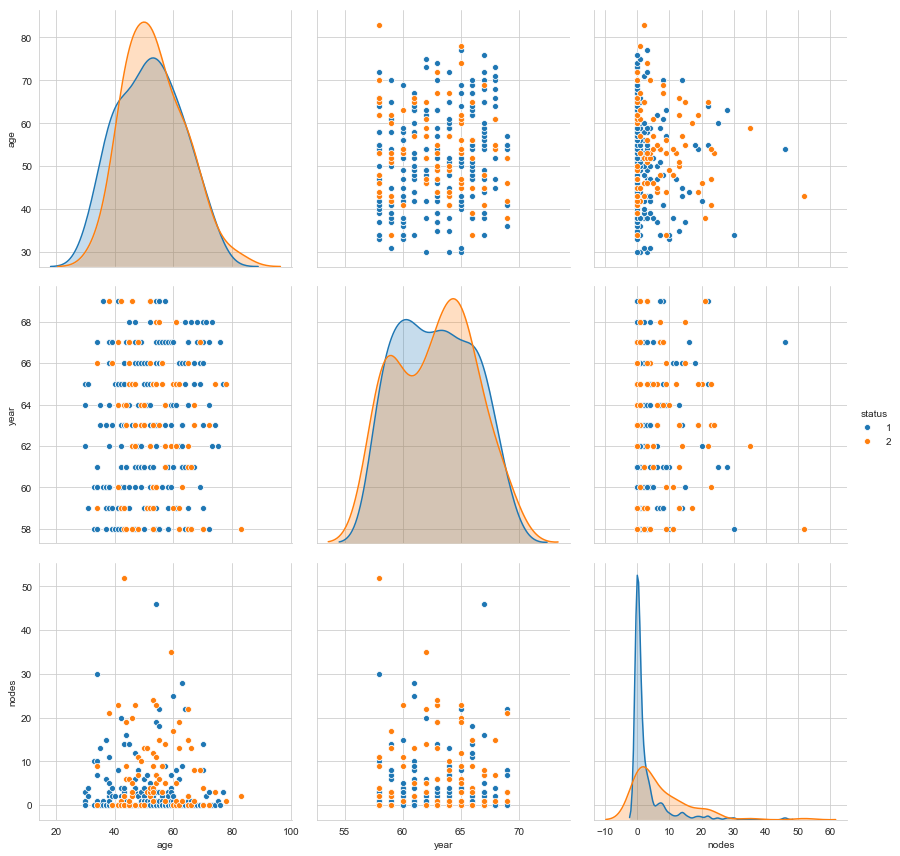

In [7]:
pair_plot = y.pair_plot()

<div class="alert alert-block alert-success"><b>Summary:</b> 
<br>
1. Both the status overlap pretty much with all the features
<br>
2. Hard to distinguish classes looking with any feature
    
    a) Age vs Nodes- Pockets of area where the classes are distingushable
    b) Year vs Age - Both the classes overlap pretty much. 
    c) Year Vs Node - hard to categorize class

<br> <b> Conclusion :</b>

    1) Age Vs Nodes are the only features that looks okay
    

    
</div>

In [8]:
from scipy.stats import norm


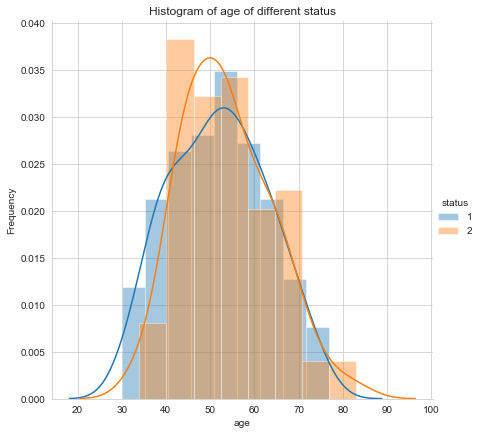

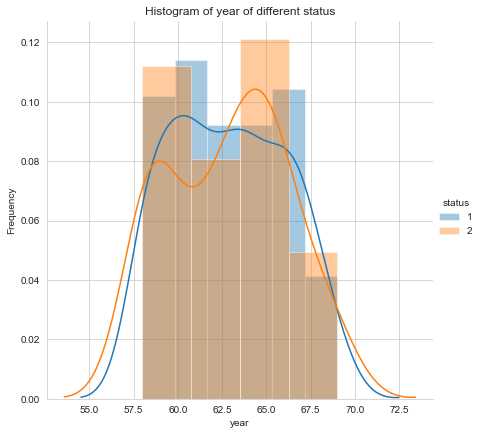

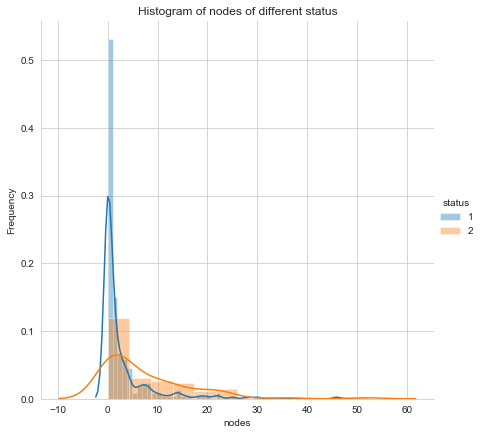

In [9]:
y.hist_plot()

<div class="alert alert-block alert-success"><b>Summary:</b> 
<br>
1. Age
   
    a) High overlap between the ages 35-75
    b) Age < 35  -> Status 1, but it's in the tail
    c) Age > 75  -> Status 2, but it's in the tail

<br>2. Year

     a) High overlap 


<br>  3.Node

    a) Both classes has different nodal mean
    b) Node feature will be important for categorization
    

    
</div>

## PDF and CDF Plots

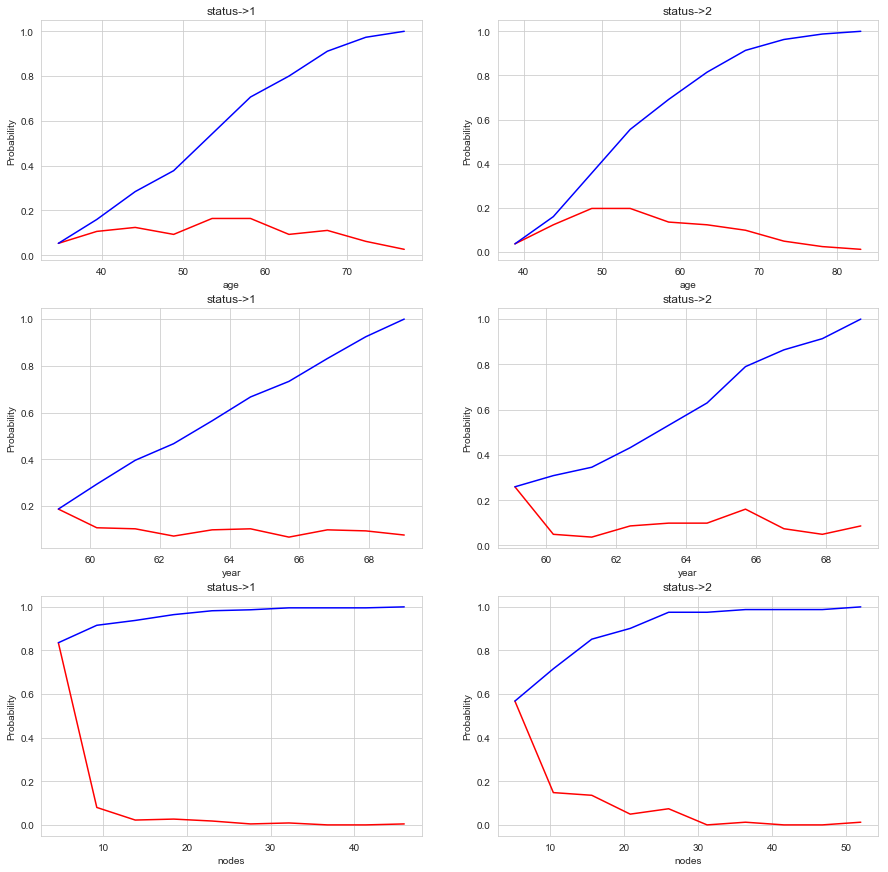

In [10]:
y.pdf_plots()

<div class="alert alert-block alert-success"><b>Summary:</b> 
<br>
1. Pdf & CDF Plots <b>
   
    a) Very similar probabilities for both the classes as we look at the distribution of the features
    b) Hard to decipher looking at the PDF and CDF plots
    c) High Overlap 
</b>
</div>

### Mean and Std-dev

In [11]:
x= y.Statistics_Mean_Std()

In [12]:
x.head()

,status1_Mean,status1_Stand_Dev,status2_Mean,status2_Stand_Dev
age,52.017778,10.987655,53.679012,10.104182
year,62.862222,3.215745,62.827160,3.321424
nodes,2.791111,5.857258,7.456790,9.128776


<div class="alert alert-block alert-success"><b>Summary:</b> 
<br>
1. Means and Standard deviation <b>
   
    a) As elluded earlier both classes have different nodal means. But Status -> 2 has high nodel standard  deviation. Reason for overlap between the two status
      

</b>
</div>

### Median, Percentile, Quantile, IQR, MAD

In [13]:
z= y.Statistics_Median_Percentile_Quantile_IQR_MAD()

In [14]:
z

,status1_Median,status1_0_Quantile,status1_25_Quantile,status1_50_Quantile,status1_75_Quantile,status1_90_Percentile,status1_MAD,status2_Median,status2_0_Quantile,status2_25_Quantile,status2_50_Quantile,status2_75_Quantile,status2_90_Percentile,status2_MAD
age,52.0,30.0,43.0,52.0,60.0,67.0,13.343420,53.0,34.0,46.0,53.0,61.0,67.0,11.860818
year,63.0,58.0,60.0,63.0,66.0,67.0,4.447807,63.0,58.0,59.0,63.0,65.0,67.0,4.447807
nodes,0.0,0.0,0.0,0.0,3.0,8.0,0.000000,4.0,0.0,1.0,4.0,11.0,20.0,5.930409


<div class="alert alert-block alert-success"><b>Summary:</b> 
<br>
1. Median, Percentile, Quantile, IQR, MAD <b>
   
    a) Age and Year has very similar statistics across both the status
    b) Node has different median among classes and different perentiles and Quantiles
    c) Node feature is useful for classification of statuses
      

</b>
</div>

### Box plot and Whiskers

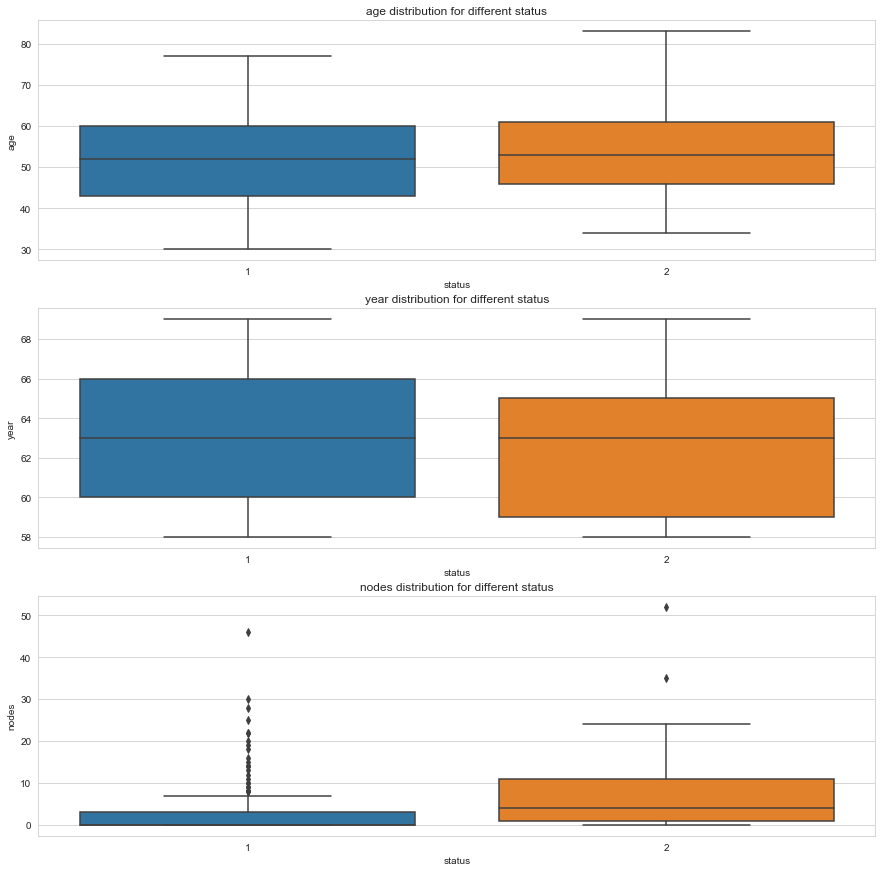

In [15]:
y.Box_Plot()

<div class="alert alert-block alert-success"><b>Summary:</b> 
<br>
1. Box Plot and Whsikers <b>
   
    a) 90-95% of the population of the data is between 43-60
    b) Node < 5 -> has status 1. Higher chances of survival
      

</b>
</div>

### Violin Plot

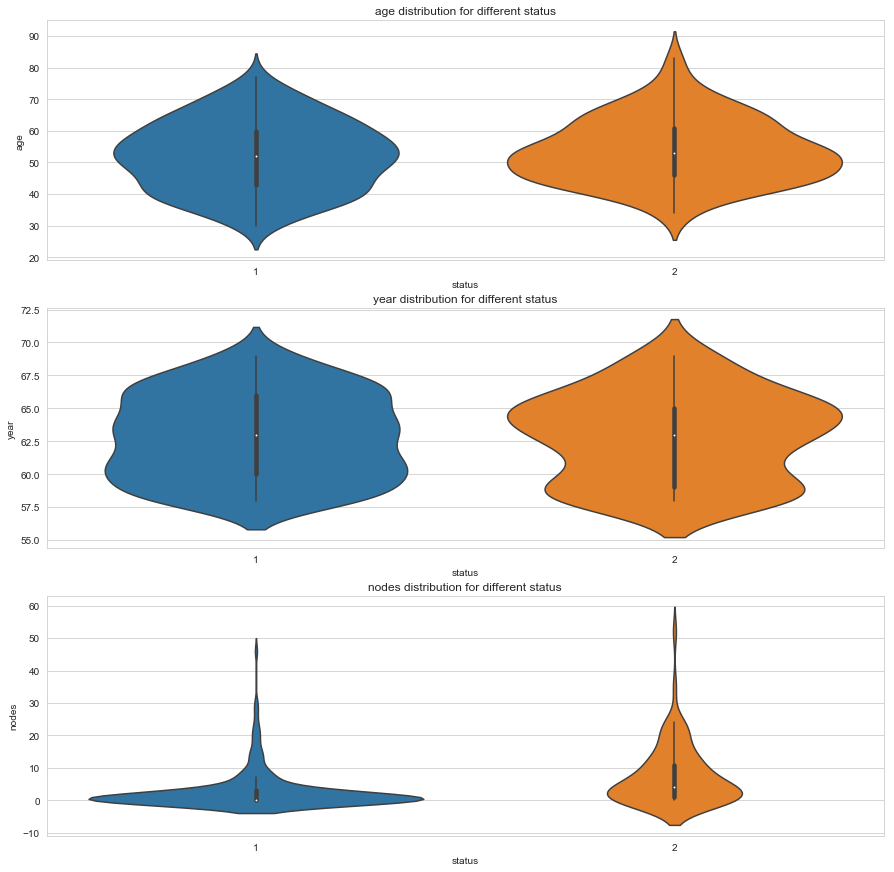

In [16]:
y.violin_Plot()

<div class="alert alert-block alert-success"><b>Summary:</b> 
<br>
1. Violin Plot <b>
   
    a) Age data is normally distributed. But both the classes has higher overlap. 
       Hard to decipher the status or survival just looking at the age
    b) Nodes range (0-7) has higher status 1 -> Survival. But has some overlap with status 2 (Non survival rate. We can not say that with certainity between nodal 5-7.
    
      

</b>
</div>